# Tutorial
In the following we will demonstrate the `petropandas` package. At first we need to import it.

<div class="alert alert-block alert-info">
<b>Note:</b> For convinience, the common libraries <code>pandas</code>, <code>numpy</code>, <code>matplotlib</code> and <code>seaborn</code> are imported with aliases <code>pd</code>, <code>np</code>, <code>plt</code> and <code>sns</code>.
</div>

In [1]:
from petropandas import *

`petropandas` are biult as `pandas.DataFrame` accessors, so we need have the DataFrame. Here we use some data from built-in examples.

In [2]:
from petropandas.data import bulk as rock
from petropandas.data import minerals as df
from petropandas.data import grt_profile as pro

## Mineral recalculations

Here are our analyses

In [3]:
df

,SiO2,Al2O3,MgO,FeO,MnO,CaO,K2O,Na2O,TiO2,Cr2O3,ZnO,P2O5,Y2O3,F,Cl,Total,Comment
0,37.218,20.349,13.784,13.140,0.000,0.013,8.998,0.404,1.010,0.022,0.020,0.005,0.007,0.367,0.368,95.467,bt-01
1,37.363,20.037,14.106,12.539,0.000,0.013,8.946,0.461,1.206,0.020,0.042,0.000,0.000,0.313,0.335,95.173,bt-02
2,23.748,22.152,9.611,31.549,0.066,0.028,0.023,0.035,0.047,0.000,0.017,0.037,0.000,0.017,0.196,87.475,chl-04
3,46.986,39.183,0.151,1.264,0.033,0.410,3.409,4.883,0.083,0.000,0.000,0.006,0.000,0.000,0.065,96.458,pa-05
4,48.389,32.414,8.227,7.713,0.060,0.027,0.000,0.924,0.005,0.009,0.000,0.005,0.000,0.000,0.014,97.784,cd-06
5,48.870,32.696,8.390,7.482,0.068,0.049,0.000,0.845,0.000,0.000,0.000,0.000,0.000,0.000,0.023,98.418,cd-07
6,61.839,24.661,0.000,0.484,0.015,5.738,0.032,7.917,0.000,0.010,0.019,0.025,0.000,0.000,0.000,100.740,pl-08
7,37.816,21.184,4.189,35.118,1.001,1.435,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.004,100.752,g-09
8,37.584,21.311,4.651,33.895,0.999,1.454,0.000,0.035,0.013,0.034,0.000,0.030,0.107,0.000,0.014,100.124,g-10
9,60.657,25.087,0.001,0.000,0.000,5.849,0.106,7.940,0.000,0.000,0.003,0.113,0.000,0.000,0.000,99.756,pl-22


Accessor `petro` provides several common utilities. Here we use the `search` to quickly select data of interest. Of course, any other standard `pandas` techniques could be used as well.

Let's select analyses of garnet identified by `"g-"` in column `"Comments"`.

In [4]:
g = df.petro.search("g-", on="Comment")
g

,SiO2,Al2O3,MgO,FeO,MnO,CaO,K2O,Na2O,TiO2,Cr2O3,ZnO,P2O5,Y2O3,F,Cl,Total,Comment
7,37.816,21.184,4.189,35.118,1.001,1.435,0.0,0.000,0.000,0.000,0.0,0.006,0.000,0.0,0.004,100.752,g-09
8,37.584,21.311,4.651,33.895,0.999,1.454,0.0,0.035,0.013,0.034,0.0,0.030,0.107,0.0,0.014,100.124,g-10


Analyses could be converted to cations p.f.u, either providing number of oxygens:

In [5]:
g.oxides.cations(noxy=12)

,Si{4+},Al{3+},Mg{2+},Fe{2+},Mn{2+},Ca{2+},K{+},Na{+},Ti{4+},Cr{3+},Zn{2+},P{5+},Y{3+}
7,3.003360,1.982876,0.495965,2.332543,0.067337,0.122112,0.0,0.000000,0.000000,0.00000,0.0,0.000403,0.000000
8,2.991367,1.999062,0.551851,2.256163,0.067347,0.123995,0.0,0.005401,0.000778,0.00214,0.0,0.002021,0.004532


or number of cations:

In [6]:
g.oxides.cations(ncat=8, tocat=True)

,Si{4+},Al{3+},Mg{2+},Fe{2+},Mn{2+},Ca{2+},K{+},Na{+},Ti{4+},Cr{3+},Zn{2+},P{5+},Y{3+}
7,3.001636,1.981738,0.49568,2.331204,0.067298,0.122041,0.0,0.000000,0.000000,0.000000,0.0,0.000403,0.000000
8,2.989627,1.997899,0.55153,2.254850,0.067308,0.123923,0.0,0.005398,0.000778,0.002138,0.0,0.002020,0.004529


To calculate endmembers, we need to use `mindb.Garnet` instance:

In [7]:
grt = mindb.Garnet()
g.oxides.endmembers(grt)

,Alm,Prp,Sps,Grs,Adr,Uv,CaTi
7,0.771846,0.165092,0.022414,0.040367,0.000281,0.000000,0.000000
8,0.751056,0.184851,0.022559,0.041276,0.000197,0.000044,0.000016


Similarily, we can recalculate analyses of plagioclase

In [8]:
p = df.petro.search("pl-", on="Comment")
plg = mindb.Feldspar()
p.oxides.endmembers(plg)

,An,Ab,Or
6,0.285438,0.712666,0.001895
9,0.287517,0.706279,0.006204
10,0.284836,0.710546,0.004619


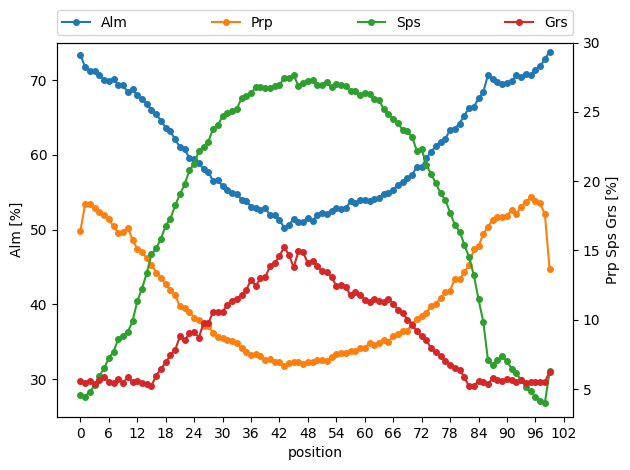

In [9]:
em = pro.oxides.endmembers(grt)
em.petroplots.garnet_profile(percents=True, lim=(25, 75), lim_extra=(3, 30))

## Whole-rock analyses

Here we use example data of bulk rock composition measured from thinsection. To obtain average composition, several areas of same size have been measured

In [10]:
rock

,Label,Na2O,MgO,Al2O3,SiO2,P2O5,K2O,CaO,TiO2,MnO,FeO,Total
0,Spectrum 1,3.33,1.46,9.32,77.82,0.00,1.84,0.90,0.75,0.06,3.96,99.35
1,Spectrum 2,4.18,2.05,13.19,73.44,0.03,2.64,1.13,1.07,0.07,5.81,103.62
2,Spectrum 3,2.31,6.25,20.73,39.89,0.33,6.35,0.89,3.53,0.83,19.01,100.11
3,Spectrum 4,1.89,4.06,20.62,38.54,0.74,2.20,2.01,3.73,4.62,24.50,102.90
4,Spectrum 5,3.80,3.97,21.22,43.56,0.31,3.65,1.48,3.29,1.84,17.02,100.15
5,Spectrum 6,2.67,4.66,20.09,41.00,0.30,3.89,1.45,2.93,2.84,20.59,100.42
6,Spectrum 7,0.57,3.86,19.62,35.74,0.51,1.29,1.99,3.48,6.68,28.32,102.06
7,Spectrum 8,1.54,6.96,19.39,38.36,0.24,7.05,0.67,3.63,0.97,20.72,99.52
8,Spectrum 9,3.06,1.39,8.66,80.20,0.00,1.74,0.85,0.74,0.05,4.08,100.70


To calculate the average composition, we can calculate the average using `mean`

In [11]:
avg = rock.oxides.mean()
avg

,Na2O,MgO,Al2O3,SiO2,P2O5,K2O,CaO,TiO2,MnO,FeO
0,2.594444,3.851111,16.982222,52.061111,0.273333,3.405556,1.263333,2.572222,1.995556,16.001111


To use this composition for modelling software, you can use methods to format it. For THERMOCALC

In [12]:
avg.oxides.TCbulk(H2O=1.5, oxygen=0.1)

bulk    H2O   SiO2  Al2O3    CaO    MgO    FeO    K2O   Na2O   TiO2    MnO      O
bulk  5.329 54.420 10.461  1.012  6.001 13.988  2.271  2.629  2.023  1.767  0.100  % 0


for PerpleX

In [13]:
avg.oxides.Perplexbulk(H2O=1.5, oxygen=0.1)

begin thermodynamic component list
H2O   1  5.32856      0.00000      0.00000     molar amount
SiO2  1 54.41996      0.00000      0.00000     molar amount
Al2O3 1 10.46080      0.00000      0.00000     molar amount
CaO   1  1.01179      0.00000      0.00000     molar amount
MgO   1  6.00122      0.00000      0.00000     molar amount
FeO   1 13.98824      0.00000      0.00000     molar amount
K2O   1  2.27071      0.00000      0.00000     molar amount
Na2O  1  2.62909      0.00000      0.00000     molar amount
TiO2  1  2.02280      0.00000      0.00000     molar amount
MnO   1  1.76683      0.00000      0.00000     molar amount
O2    1  0.20000      0.00000      0.00000     molar amount
end thermodynamic component list


or MAGEMin

In [14]:
avg.oxides.MAGEMin(H2O=1.5, oxygen=0.1, db='mp')

# HEADER
title; comments; db; sysUnit; oxide; frac; frac2
# BULK-ROCK COMPOSITION
0;petropandas;mp;mol;[SiO2, Al2O3, CaO, MgO, FeO, K2O, Na2O, TiO2, O, MnO, H2O];[54.420, 10.461, 1.012, 6.001, 13.988, 2.271, 2.629, 2.023, 0.100, 1.767, 5.329];
